In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)

## 정규분포 그려서 비교

[]

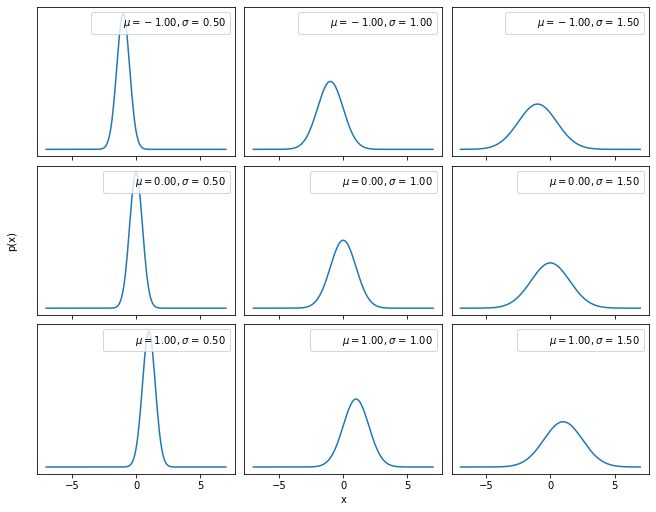

In [3]:
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True, figsize = (9,7), constrained_layout = True)

for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot([], label = r'$\mu = {:3.2f}, \sigma$ = {:3.2f}'.format(mu, sd), alpha=0)
        ax[i, j].legend(loc=1)
ax[2, 1].set_xlabel('x')
ax[1, 0].set_ylabel('p(x)', labelpad = 20)
ax[1, 0].set_yticks([])

베이지안 통계학의 경우 Priorior, Likelihood를 이용하여 Posterior를 구하는 것을 목표로 한다.  
예를들어 특정 데이터들이 있을 때 분포를 구한다고 하자. 결국 데이터의 분포를 가정할때, 특정 모수가 결정되면  
특정 확률분포가 결정이 된다. 여기서 Prior는 모수에 대한 확률분포, Likelihood는 매개변수가 주어졌을때, 데이터들이 분포를 따를 확률로 볼 수 있다.  
우리의 목표는 Posterior를 구하는 것인데, 베이즈 법칙에 의해 Posterior는 Prior와 Likelihood의 곱하기에 비례한다.  
즉 데이터가 주어지고, 특정 분포를 가정을 한다면, 모수에 대한 분포, 데이터의 분포를 가정하고, 베이즈 법칙을 통해 모수에 대한 분포를 구하면 된다.

## 이항분포

동전을 던졌을 때 앞이 나오는 횟수를 확률변수로 두어, 이에 대한 분포를 구하는 것을 해보자

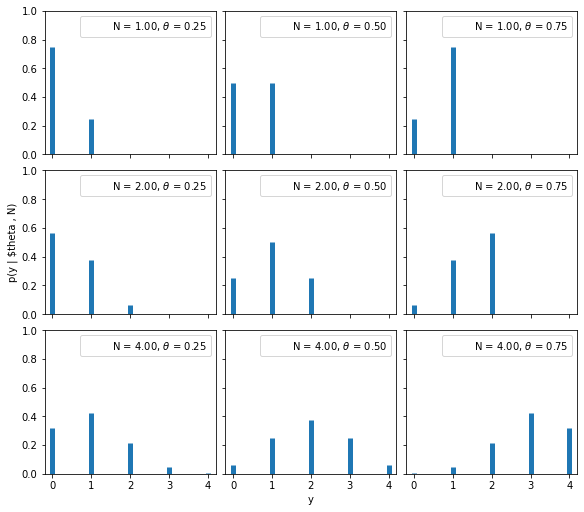

In [4]:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]

x = np.arange(0, max(n_params)+1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize = (8,7), constrained_layout = True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        
        y = stats.binom(n=n, p=p).pmf(x)
        
        ax[i, j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i, j].set_ylim(0, 1)
        ax[i, j].plot(0, 0, label=r'N = {:3.2f}, $\theta$ = {:3.2f}'.format(n, p), alpha = 0)
        ax[i, j].legend()
ax[2, 1].set_xlabel('y')
ax[1, 0].set_ylabel('p(y | $theta , N)')
ax[0, 0].set_xticks(x)

모수 N과 $\theta$ 가 주어졌을때 분포를 나타낸 것이다. 여기서는 likelihood를 가정한 것이다.

## Beta 분포

Text(0.07, 0.5, 'p(θ)')

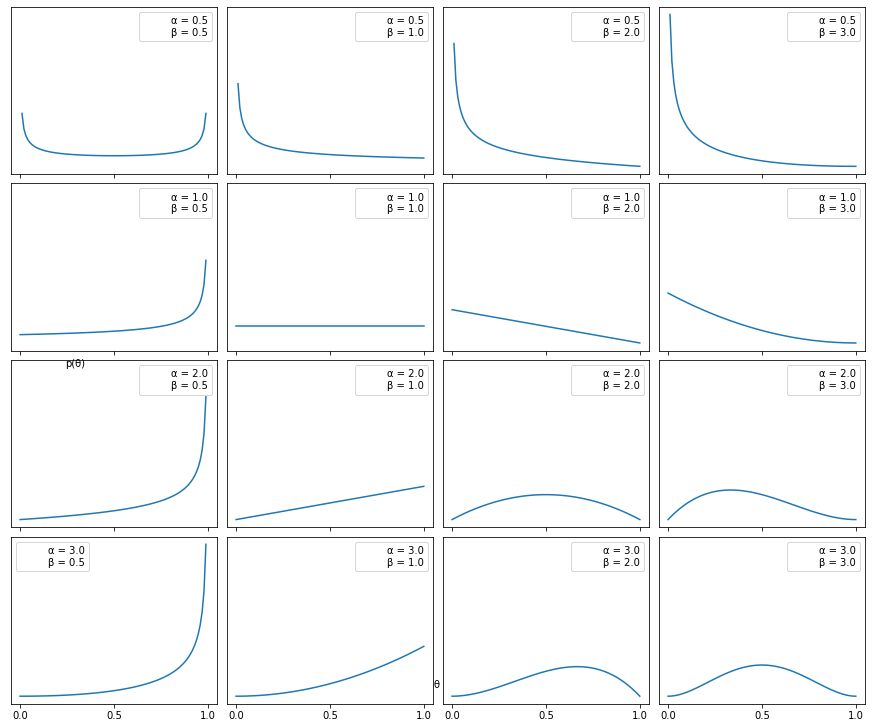

In [5]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True,
                     figsize=(12, 10), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

$\beta$분포는 Binary 분포에 대한 Conjugate 분포이다.
즉 $\theta$에 대한 분포를 가정할때 $\beta$분포를 가정한다.

## Conjugate Prior

앞서 Posterior는 Prior와 Likelihood의 곱으로 나타낼 수 있다.  즉 여기서 Likelihood는 Binary 분포, 즉 이항분포로 정보를 제한하였을때, 데이터가 분포를 따를 확률이고, Prior는 이항분포에서 확률의 값, 여기서 Beta 분포이다.  
이항분포와 Beta 분포를 곱할 경우 식이 베타분포의 형태가 나온다.  
즉 Posterior는 베타분포를 따르고, 이때 Posterior에 대해 theta의 분포가 beta 분포 형태로 나오게 된다.

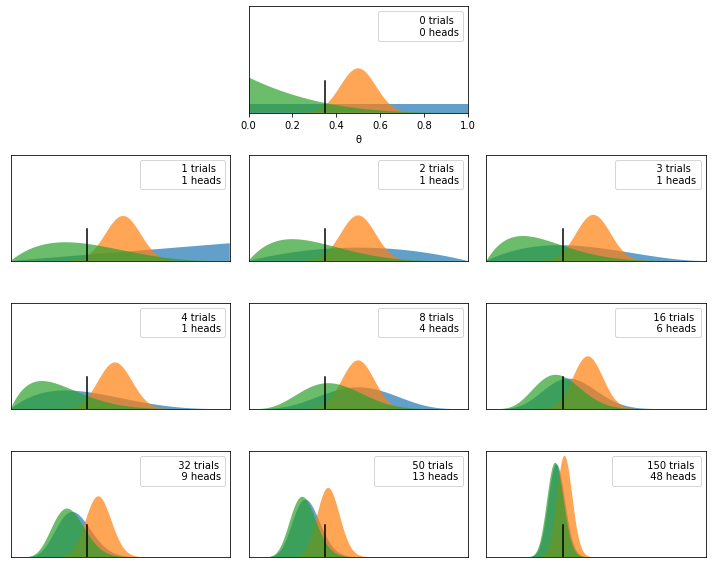

In [6]:
plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        # binary 분포와 beta 분포 곱한 뒤 계산 후 theta에 대한 분포 계산
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

In [7]:
import arviz as az

<AxesSubplot:title={'center':'θ'}>

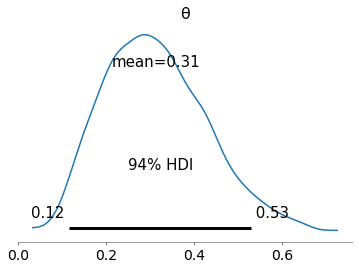

In [8]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size = 1000)})
# a = 5, b = 11 일때 베타 분포